# Probabilities and Distributions I

* Deterministic programs focus on inputs and outputs (yes and no)
* Probabilistic programs focus on decisions under uncertainty (well, maybe, perhaps, it could happen)
* Random variables are used to represent uncertainty in that they represent the possible outcomes of a random experiment
* The probability of a random variable (flipping a coin, the roll of a die)
* Regarding finance, in the case of risk, the outcome is unknown, but the probability distribution governing that outcome is known. Uncertainty, on the other hand, is characterised by both an unknown outcome and an unknown probability distribution. In both cases, preferences are defined across chance distributions of outcomes.
* Variance is a measure of the dispersion of a random variable

>According to Wikipedia (2022):

>> A random variable is a mathematical formalization of a quantity or object which depends on random events. Informally, randomness typically represents some fundamental element of chance, such as in the roll of a dice; it may also represent uncertainty, such as measurement error (para 1).

>Random variable. (February 6, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Random_variable

* Variance shows the relationships between its members and the mean

>According to Wikipedia (2022):

>> In probability theory and statistics, variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value. Variance has a central role in statistics, where some ideas that use it include descriptive statistics, statistical inference, hypothesis testing, goodness of fit, and Monte Carlo sampling. Variance is an important tool in the sciences, where statistical analysis of data is common. The variance is the square of the standard deviation, the second central moment of a distribution, and the covariance of the random variable with itself... (para 1).

>Variance. (February 6, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Variance

* Error is the difference between the true value and the predicted value, or the model describing the values
* There is nothing we can do about the variance of the dataset outside of cleaning and elimination meaningless noise
* $s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$ 
* Standard deviation has the same units as the data being measured
* But we can play a role on the variance of a model trained on different data sets 
* $RSS = \sum(y - \hat{y})^2$ 
* The mean of a random variable is also know as its expected value
* The standard deviation of a statistic (a characteristic of a sample) is generally temed the standard error

## Data Does Not Speak for Itself

The numbers have no way of speaking for themselves. We speak for them. We imbue them with meaning. Nate Silver, The Signal and the Noise

## Probability

* Probability of an event is measured from 0 to 1; 0 event not happening, 1 event always happening
* Outcomes you are looking for / total possible outcomes
* Terms you may see: events and sample space
* Combinations, permutations, factorials
* Intersections, unions, and conditional probability
* Bayes Theorem and Bayes Inference
* Probability is associated with Bootstrapping
* Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics. (https://statisticsbyjim.com/hypothesis-testing/bootstrapping/).

https://www.statology.org/variance-of-probability-distribution/<br />
https://www.probabilitycourse.com/preface.php

## Types of Probability

* Classical Probability: the ratio of the number of outcomes favoring the event divided by the total number of possible outcomes
* Enmerative Probability: An extension of classical probability with the idea of a random choice. There are 3 white socks and four black socks and if we take a random sock what is the probability of getting a white sock?
* Long Run Frequency Probability: Based on the proportion of times an event occurs in an infinite sequence of identical experiments. Nothing realistically, even in principle, is infinitely repeatable
* Propensity or Chance: The idea that there is some objective tendency of the situation to produce and event
* Subjective Probability: A specific person's judgement about a specific occasion, based on their current knowledge. Essentially, any numerical probability is constructed according to what is known in the current situation (probability doesn't really exist at all)

Art of Statistics

## Distribution of Rolling One Die 

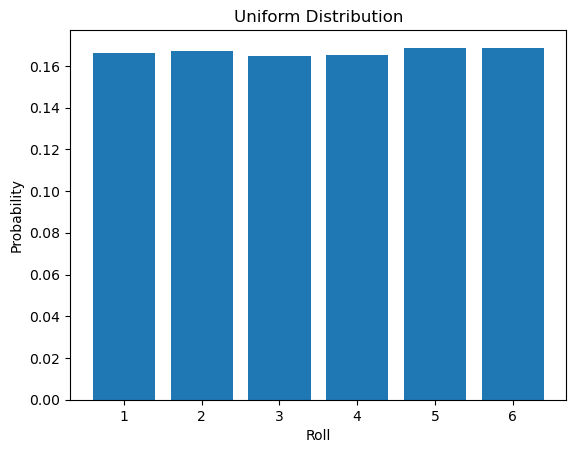

In [1]:
# uniform distribution
import numpy as np
import matplotlib.pyplot as plt

throws = int(1e5) # 1 multiplied by 10 to the 5th or 100000
observations = []
for i in range(throws):    
    roll = np.random.choice(['1', '2', '3', '4', '5', '6']) # roll the die
    observations.append(roll)

val, cnt = np.unique(observations, return_counts=True)
prop = cnt / len(observations)

plt.bar(val, prop)
plt.ylabel('Probability')
plt.xlabel('Roll')
plt.title('Uniform Distribution')
plt.show()

## Distribution of Rolling Two Die

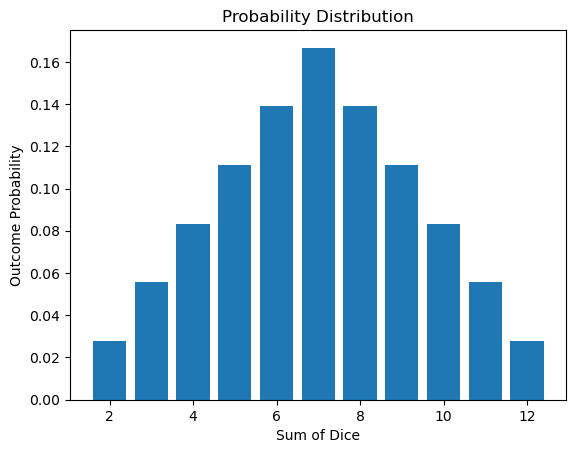

In [2]:
# plot probability distribution
import matplotlib.pyplot as plt

sums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
probs = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]

plt.bar(sums, probs)
plt.xlabel('Sum of Dice')
plt.ylabel('Outcome Probability')
plt.title('Probability Distribution')
plt.show();

## The Normal Curve Distribution with the 68-95-99.7 rule

The area between -3 and 3 is considered to contains 99.73% of the area in the curve
The area between -2 and 2 is considered to contains 95.44% of the area in the curve
The area between -1 and 1 is considered to contains 68.26% of the area in the curve
The line at 0 is the expected average of the normal distribution at 50%

Mean:  0.0057067923726013756
Median:  0.016755848224194334
Mode? -3.938419727723627
Variance:  0.9844396978998666
Standard Deviation:  0.9921893457903419


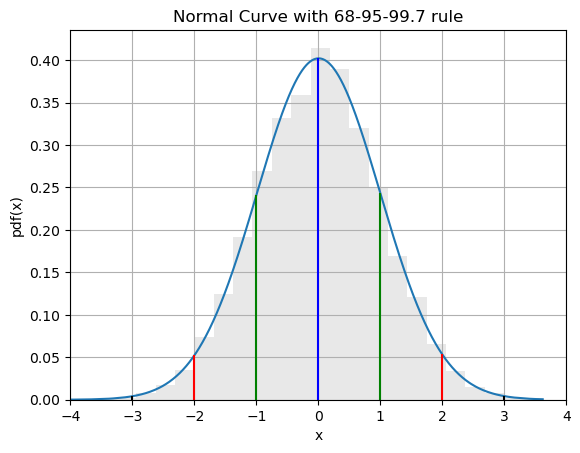

In [4]:
# compare CDF and PPF
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

X = stats.norm.rvs(size=10000)
X.sort()

parameters = stats.norm.fit(X) 
mu, sigma = parameters

print('The area between -3 and 3 is considered to contains 99.73% of the area in the curve')
print('The area between -2 and 2 is considered to contains 95.44% of the area in the curve')
print('The area between -1 and 1 is considered to contains 68.26% of the area in the curve')
print('The line at 0 is the expected average of the normal distribution at 50%')
print()
print('Mean: ', np.mean(X))
print('Median: ', np.median(X))
print('Mode?', X[1])
print('Variance: ', np.var(X))
print('Standard Deviation: ', np.std(X))

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

https://www.statology.org/sample-variance-vs-population-variance/<br />
Equation for population variance:<br />
$\sigma^2 = \frac{1}{N}\sum({x}-\bar{x})^2$

In [5]:
print(sum(X**2))
print(len(X))

9844.722653790559
10000


### Normal Distribution

The Math: <br />
$
\frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}
$

* The height of the mode in a normal density is 1/√(2π)σ≈.3989/σ (or roughly 0.4/σ). You can see this by substituting the mode (which is also the mean, μ) for x in the formula for a normal density. So there's no single "ideal height" -- it depends on the standard deviation.
* https://stats.stackexchange.com/questions/143631/height-of-a-normal-distribution-curve
* Standard Deviation is sensitive to outliers (which can cause problems with our shape)
* A good analysis will include mean and median, unless something is being hid or emphasis is being made
* Skewness and Kurtosis: https://www.simplypsychology.org/kurtosis.html

## Some History

* Greeks: Geometry and Form
* Romans weren't really into beauty and form, but rather war and liesure
* While finding little value in abstract geometry, Cicero (Roman) wrote that probability is the very guide of life
* **Gerolamo Cardano** (24 September 1501– 21 September 1576), The Book on Games of Chance
* **Galileo Galilei** (15 February 1564 – 8 January 1642)
    * Introduces the idea that science must focus on experience and experimentation—how nature operates—rather than on what intuition dictates or our minds find appealing. And most of all, it must be done with mathematics.
    * Wrote a book Thoughts on the Game of Dice  
* **Blaise Pascal** (19 June 1623 – 19 August 1662) added to probability and gambling
* Pascal's development of probability theory was his most influential contribution to mathematics. Originally applied to gambling, today it is extremely important in economics, especially in actuarial science
* Pascal's Triangle: Pascal’s triangle is useful any time you need to know the number of ways in which you can choose some number of objects from a collection that has an equal or greater number
* For example (The Drunkard's Walk): 1996 World Series. Atlanta was up 2 - 0
    * Probabilites for either team to win: possible 5 games to play 2^5 gives us 32 probabilities
    * Yankees’ victory, would have been victorious if they had won 4 of the 5 possible remaining games. 
    * 1 of 5 ways: BYYYY, YBYYY, YYBYY, YYYBY, or YYYYB,  and YYYYY. 
    * Braves victory: Yankees win only 3 games, 10 possible ways (BBYYY, BYBYY, and so on), or Yankees win only 2 games (which again could have happened in 10 ways), or if the Yankees had won only 1 game (which could have happened in 5 ways), or if they had won none (which could have happened in only 1 way). 
    * Possibilities = 32, Yankees 6 in 32 and Braves 26 in 32 (Yankees won)
    * Considering Pascal's Triangle, We can now read the number of ways in which the Yankees can win 0, 1, 2, 3, 4, or 5 games directly from row 5 of the triangle:
    * 1 5 10 10 5 1

https://www.mathsisfun.com/pascals-triangle.html

Another Example of Sample Space:

Suppose a mother is carrying fraternal twins and wants to know the odds of having two girls, a boy and a girl, and so on.

* The sample space consists of all the possible lists of the sexes of the children in their birth order: (girl, girl), (girl, boy), (boy, girl), and (boy, boy)
* Same with 2 coin toss (HH, TT, HT, TH)
* Situation in which one problem is another in disguise: isomorphism
* Two girls: 25 percent. 
* The chance that at least one of the babies will be a girl is the chance that both will be girls plus the chance that just one will be a girl—that is, 25 percent plus 50 percent, which is 75 percent.
* What are the chances, given that one of the children is a girl, that both children will be girls? One might reason this way: 50 percent? 
* Although the statement of the problem says that one child is a girl, it doesn’t say which one, and that changes things. * 
* The new information—one of the children is a girl—means that we are eliminating from consideration the possibility that both children are boys. So eliminate (boy, boy) from the sample space. 
* That leaves only 3 outcomes in the sample space: (girl, boy), (boy, girl), and (girl, girl). Of these, only (girl, girl) is the favorable outcome—that is, both children are daughters—so the chances that both children are girls is 1 in 3, or
33 percent.
* For instance, if the problem had asked for the chances of both children being girls given that the first child is a girl, then we would have eliminated both (boy, boy) and (boy, girl) from the sample space and the odds would have been 1 in 2, or 50 percent

## Probability Foundations

* The probability that two events will both occur can never be greater than the probability that each will occur individually. Why not? Simple arithmetic: the chances that event A will occur = the chances that events A and B will occur + the chance that event A will occur and event B will not occur.   
* If two possible events, A and B, are independent, then the probability that both A and B will occur is equal to the product of their individual probabilities
* If an event can have a number of different and distinct possible outcomes, A, B, C, and so on, then the probability that either A or B will occur is equal to the sum of the individual probabilities of A and B, and the sum of the probabilities of all the possible outcomes (A, B, C, and so on) is 1 (that is, 100%)

## Adding or Multiplying Probabilities

* If using the word `or`, add
* If using the word `and`, multiply
    * What's the probability of rolling a 1 or a 6
    * What's the probability of first rolling a 1 and then a 6
    
### Probability of Two Events Occurring Together: Independent

$P(A \cap B) = P(A) * P(B)$

Multiply the probabilities of each event together

Example problem: The probability of getting a job you applied for is 45% and the probability of you getting the apartment you applied for is 75%. What is the probability of getting both the new job and the new car?

* Step 1: Convert your percentages of the two events to decimals. In the above example:
    * 45% = .45
    * 75% = .75
* Step 2: Multiply the decimals from step 1 together:
    * .45 x .75 = .3375 or 33.75 percent.
* The probability of you getting the job and the car is 33.75%
* The probability that two events will both occur can never be greater than the probability that each will occur individually.


### Probability of Two Events Occurring Together: Dependent

$P(A \cap B) = P(A) * P(B|A)$

Example problem: Eighty five percent of employees have health insurance. Out of those 85%, 45% had deductibles higher than 1K. What percentage of people had deductibles higher than 1K?

* Step 1: Convert your percentages of the two events to decimals. In the above example:
    * 85% = .85
    * 45% = .45
* Step 2: Multiply the decimals from step 1 together:
    * .85 x .45 = .3825 or 38.35 percent.
* The probability of someone having a deductible of over $1,000 is 38.35%
 The probability that two events will both occur can never be greater than the probability that each will occur individually.

https://www.statisticshowto.com/probability-and-statistics/probability-main-index/how-to-find-the-probability-of-two-events-occurring-together/

In a pack of 52 cards, a card is drawn at random without replacement. Find the probability of drawing a queen followed by a jack.

Solution:

* P (drawing a queen in the first place) = 4 / 52
* P (drawing jack in the second place given that queen is in the first place) = 4 / 51
* P (drawing a queen followed by a jack)
* (4/52) * (4/51)

### Thoughts on Dependent or Independent?

* Man with mustache 1/4
* Man with beard 1/10

## The Conjuction Fallacy

The Conjunction Fallacy is a fallacy or error in decision making where people judge that a conjunction of two possible events is more likely than one or both of the conjuncts.

* Which is greater: the number of six-letter English words having n as their fifth letter or the number of six-letter 
English words ending in ing?
* Which is more likely: that a defendant, after discovering the body, left the scene of the crime or that a defendant, after discovering the body, left the scene of the crime because he feared being accused of the grisly murder? 
* Is it more probable that the president will increase federal aid to education or that he or she will increase federal aid to education with funding freed by cutting other aid to the states? 
* Is it more likely that your company will increase sales next year or that it will increase sales next year because the overall economy has had a banner year? 

In each case, even though the latter is less probable than the former, it may sound more likely. Or as Kahneman and Tversky put it, “A good story is often less probable than a less satisfactory explanation.

The Romans believed two half truths equal 1 whole truth. Their problem was that they were adding when they should have been multiplying.

The Drunkard's Walk

## Monty Hall Problem

Ask Marilyn column (in Parade magazine)

* Marilyn von Savant
* Guinness World Records Hall of Fame highest IQ
* Married to Robert Jarvik, artificial heart

Let's Make a Deal

* Monty Hall
* Wayne Brady

Suppose the contestants on a game show are given the choice of three doors: Behind one door is
a car; behind the others, goats. After a contestant picks a door, the host, who knows what’s
behind all the doors, opens one of the unchosen doors, which reveals a goat. He then says to the
contestant, “Do you want to switch to the other unopened door?” Is it to the contestant’s
advantage to make the switch?

* Marilyn says switch
* Onslaught of criticism started rolling in
* Mathematical Professors and teachers

Professor from George Mason: Let me explain: If one door is shown to be a loser, that information changes the probability of either remaining choice—neither of which has any reason to be more likely—to 1/2. As a professional mathematician, I’m very concerned with the general public’s lack of mathematical skills. Please help by confessing your error and, in the future, being more careful.

From Dickinson State University came this: “I am in shock that after being corrected by at least three mathematicians, you still do not see your mistake.” From Georgetown: “How many irate mathematicians are needed to change your mind?” And someone from the U.S. Army Research Institute remarked, “If all those PhDs are wrong the country would be in serious trouble.” Responses continued in such great numbers and for such a long time that after devoting quite a bit of column space to the issue, Marilyn decided she would no longer address it.

Marilyn was right and here's the breakdown:

* Starting with 1 out 3 choice you have the lucky guess scenario of picking the right door (1 out of 3)
* The Wrong Guess scenario has chances 2 out of 3 that you are wrong
* Host intervenes and opens a door knowing where the car is and not wanting to reveal it yet. This action violates randomness

<table>
<tr>
<td>Behind door 1</td>	<td>Behind door 2</td>	<td>Behind door 3</td>	<td>Result if staying at door 1</td>	<td>Result if switching to the door offered</td>
</tr>
<tr>
<td>Goat</td><td>Goat</td><td>Car</td>	<td>Wins goat</td>	<td>Wins car</td>
</tr>
<tr>
<td>Goat</td><td>Car</td>	<td>Goat</td>	<td>Wins goat</td>	<td>Wins car</td>
</tr>
<tr>
<td>Car</td>	<td>Goat</td><td>Goat</td>	<td>Wins car</td>	<td>Wins goat</td>
</tr>
</table>

https://en.m.wikipedia.org/wiki/Monty_Hall_problem

### Factorial

$n!$<br />
5! = 1 * 2 * 3 * 4 * 5

In [6]:
import numpy as np
from math import factorial

n = 5
fact = 1
test = 1

print(np.arange(1, n+1))
print(np.arange(1, n+1).prod())
for i in range(1, n+1):
    fact = fact * i
    test *= i # assignment operator https://www.w3schools.com/python/python_operators.asp
    
print('fact:', fact)
print('test:', test)
print('comprehension:', np.prod([i for i in range(1, n+1)]))
print('factorial:', factorial(n))

[1 2 3 4 5]
120
fact: 120
test: 120
comprehension: 120
factorial: 120


### Permutations

Order does matter (permutation, position)<br />
The combination of a safe

$_{n}P_r = \frac{n!}{(n-r)!}$

with repetitions

$n^r$

In [7]:
from itertools import permutations, product

l = [1, 2, 3]
n = len(l)
r = 3

perms = permutations(l)
print(list(perms))
print(factorial(n)/factorial(n - r))
print()
print('with repetitions (n^r)')
print([p for p in product(l, repeat=r)])
print(n**r)

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]
6.0

with repetitions (n^r)
[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 3, 3)]
27


### Permutations Reminder

$_{n}P_r = \frac{n!}{(n-r)!}$

In [8]:
from itertools import permutations, product

l = [1, 2, 3]
n = len(l)
r = 2

perms = permutations(l, r)
print(list(perms))

print(factorial(n)/factorial(n - r))

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
6.0


#### Permutation Examples

$_{16}P_{3}$ = $\frac{16!}{(16-3)!}$ = 16 x 15 x 14 = 3,360

In [9]:
# solve
n = 16
r = 3
print(factorial(n)/factorial(n - r))
print(16 * 15 * 14)

3360.0
3360


$_{10}P_{2}$ = $\frac{10!}{(10-2)!}$ = 10 x 9 = 90

In [10]:
n = 10
r = 2
print(factorial(n)/factorial(n - r))
print(10 * 9)

90.0
90


**Permutations for a four digit combination using number 0 - 9 without repetition**

$_{10}P_{4}$

In [11]:
# how many permutations without repetition?
n = 10
r = 4
print(factorial(n)/factorial(n - r))
print(10 * 9 * 8 * 7)

5040.0
5040


### Combinations

Order doesn't matter<br />
Items on a pizza

$C(n,r) = C_r^{n} = {_nC_r} = \binom {n}{r}  = \frac{n!}{r!(n-r)!}$

In [12]:
from itertools import combinations

l = [1, 2, 3]
n = len(l)
r = 2
combs = combinations(l, r)
print(list(combs))
print(factorial(n)/(factorial(r) * factorial(n - r)))

[(1, 2), (1, 3), (2, 3)]
3.0


**Practice**

Solve ${_nC_r} = \binom {n}{r}  = \frac{n!}{r!(n-r)!}$<br />
Where n = 10 and r = 4

In [13]:
# solve
n = 10
r = 4
print(factorial(n)/(factorial(r) * factorial(n - r)))

210.0


**Relationship with permutations**<br />
${_nC_r}$ * $r!$ = permutations

In [14]:
# solve and compare to permutation where n = 10 and r = 4
# see figure 1 http://mathandmultimedia.com/2010/01/02/intro-to-combinations/
210 * factorial(4)

5040

### With Replacement

$_{n+r-1}C_r = \frac{(r+n-1)!}{r!(n-1)!}$

In [15]:
from itertools import combinations_with_replacement

combs = combinations_with_replacement(l, r)
print(list(combs))
print(factorial(n+r-1)/(factorial(r)*factorial(n-1)))

[(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 1, 3), (1, 1, 2, 2), (1, 1, 2, 3), (1, 1, 3, 3), (1, 2, 2, 2), (1, 2, 2, 3), (1, 2, 3, 3), (1, 3, 3, 3), (2, 2, 2, 2), (2, 2, 2, 3), (2, 2, 3, 3), (2, 3, 3, 3), (3, 3, 3, 3)]
715.0


### Intersections

$A \cap B = \{\: x: x \in A \: and \: x \in B \:\}$

order doesn't matter $A \cap B$ or $B \cap A$

In [16]:
# https://anaconda.org/conda-forge/matplotlib-venn
# https://pypi.org/project/matplotlib-venn/
# https://towardsdatascience.com/visualizing-intersections-and-overlaps-with-python-a6af49c597d9
# https://practicaldatascience.co.uk/data-science/how-to-visualise-data-using-venn-diagrams-in-matplotlib

# import matplotlib.pyplot as plt
# from matplotlib_venn import venn2, venn2_circles

set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6, 7, 8}
print([value for value in set1 if value in set2])
print(set1 & set2)
print(set1.intersection(set2))

# venn2([set1, set2])
# plt.show()

[3, 4]
{3, 4}
{3, 4}


#### Independent

$P(A \cap B) = P(A) * P(B)$

In [17]:
# what's the probability of a random pick of a number from 1 - 10 if P(A) less than 5 and P(B) odd
# filter https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Iterables.html
event_space = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N = len(event_space)
a = filter(lambda x: x < 5, event_space)
a = list(a)
print(a)
pa = len(list(a))/N
print(pa)
b = filter(lambda x: x % 2 == 1, event_space)
b = list(b)
print(b)
pb = len(list(b))/N
print(pb)
print(f'Probability of < 5 and odd: {pa * pb}')

[1, 2, 3, 4]
0.4
[1, 3, 5, 7, 9]
0.5
Probability of < 5 and odd: 0.2


#### Dependent

$P(A \cap B) = P(A) * P(B|A) = P(B) * P(A|B)$<br />
also expressed as P(A and B) = P(A) * P(B given A)

In [18]:
# https://www.mathsisfun.com/data/probability-events-conditional.html
# https://en.wikipedia.org/wiki/Sample_space
# number of outcomes in event / total possible outcomes in sample space

bag = ['red', 'red', 'red', 'blue', 'blue']
mcolor = 'blue'
print(f'Probability of picking two {mcolor} marbles from this bag:')
bag_dict = {item:bag.count(item) for item in bag}
print(bag_dict)

# P(A) probability of picking blue 2 / 5
pa = bag_dict[mcolor] / len(bag)
print(f'Probability of picking a {mcolor}: {pa}')
bag.remove(mcolor)
print(f'Bag minus one {mcolor}:')
bag_dict = {item:bag.count(item) for item in bag}
print(bag_dict)
print(f'Probability of picking another {mcolor} with just four marbles: {(bag_dict[mcolor] / len(bag))}')
print()
# P(B|A) probability of picking another blue given you already picked a blue
print(f'Probability of picking two {mcolor} marbles in a row: {pa * (bag_dict[mcolor] / len(bag))}')

Probability of picking two blue marbles from this bag:
{'red': 3, 'blue': 2}
Probability of picking a blue: 0.4
Bag minus one blue:
{'red': 3, 'blue': 1}
Probability of picking another blue with just four marbles: 0.25

Probability of picking two blue marbles in a row: 0.1


### Unions

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$<br />
also expressed P(A or B)<br />
order doesn't matter

In [19]:
# what's the probability of a random pick of a number from 1 - 10 is P(A) less than 5 or P(B) odd
print(event_space)
print(a)
print(pa)
print(b)
print(pb)
print(f'Probability of the union of A or B is {pa + pb - (pa * pb)}')

# venn2([set(a), set(b)])
# plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4]
0.4
[1, 3, 5, 7, 9]
0.5
Probability of the union of A or B is 0.7


#### Unions if mutually exclusive (vs. disjoint)

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$ where $P(A \cap B) = 0$ 
<br />so<br />
$P(A \cup B) = P(A) + P(B)$

Mutually Exclusive: $P(A \cap B) = 0$<br />
Disjoint (dealing in sets): $A \cap B = 0$

In [20]:
# is drawing an even number or odd number mutually exclusive?
print(event_space)
N = len(event_space)
c = filter(lambda x: x % 2 == 0, event_space)
c = list(c)
print(c)
pc = len(list(c))/N
print(pc)
d = filter(lambda x: x % 2 == 1, event_space)
d = list(d)
print(d)
pd = len(list(d))/N
print(pd)
print(set(c).intersection(set(d)))

# venn2([set(c), set(d)])
# plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 4, 6, 8, 10]
0.5
[1, 3, 5, 7, 9]
0.5
set()


### Compliment

Compliment of $A$ is $\bar{A}$

Is the compliment of A mutually exclusive with A?

In [21]:
event_space = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N = len(event_space)
a = filter(lambda x: x < 5, event_space)
a = list(a)
print(a)

a_compliment = np.setdiff1d(event_space, a)
print(a_compliment)

print([value for value in event_space if value not in a])

[1, 2, 3, 4]
[ 5  6  7  8  9 10]
[5, 6, 7, 8, 9, 10]


### Conditional Probability

https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2<br />
https://towardsdatascience.com/conditional-probability-with-python-concepts-tables-code-c23ffe65d110<br />

$P(A|B) = \frac{P(A \cap B)}{P(B)}$<br />

What's the probability of something given something else

Terms
* $P(A|B)$: Probability of A given B
* $P(A \cap B)$: Probability of A and B
* $P(B)$: Probability of B

### Addition and Multiplication Rules

* Addition Rule: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
* Multiplication Rule: $P(A \cap B) = P(A) * P(B|A)$<br />

### Contingency Tables

According to Wikipedia (2022):

> In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering, and scientific research (para. 1).

Contingency table. (February 6, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Contingency_table

In [22]:
# seaborn mpg dataset
import seaborn as sns

mpg = sns.load_dataset('mpg')
print(mpg.shape)
print(mpg.head())

(398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [23]:
# find mpg quartiles
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [24]:
# create a feature where 1 represents horsepower > 94 (median) and 0 if not
mpg['above_median_hp'] = np.where(mpg['horsepower'] > 94, 1, 0)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mpg              398 non-null    float64
 1   cylinders        398 non-null    int64  
 2   displacement     398 non-null    float64
 3   horsepower       392 non-null    float64
 4   weight           398 non-null    int64  
 5   acceleration     398 non-null    float64
 6   model_year       398 non-null    int64  
 7   origin           398 non-null    object 
 8   name             398 non-null    object 
 9   above_median_hp  398 non-null    int32  
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 29.7+ KB


In [25]:
# create a feature where 1 represents mpg > 23 and 0 if not
mpg['above_median_mpg'] = np.where(mpg['mpg'] > 23, 1, 0)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mpg               398 non-null    float64
 1   cylinders         398 non-null    int64  
 2   displacement      398 non-null    float64
 3   horsepower        392 non-null    float64
 4   weight            398 non-null    int64  
 5   acceleration      398 non-null    float64
 6   model_year        398 non-null    int64  
 7   origin            398 non-null    object 
 8   name              398 non-null    object 
 9   above_median_hp   398 non-null    int32  
 10  above_median_mpg  398 non-null    int32  
dtypes: float64(4), int32(2), int64(3), object(2)
memory usage: 31.2+ KB


In [26]:
mpg['count'] = 1

### Pivot Table

According to Wikipedia (2022):

> A pivot table is a table of grouped values that aggregates the individual items of a more extensive table (such as from a database, spreadsheet, or business intelligence program) within one or more discrete categories. This summary might include sums, averages, or other statistics, which the pivot table groups together using a chosen aggregation function applied to the grouped values (para. 1).

Contingency table. (February 9, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Pivot_table

In [27]:
# create pivot table
result_pivot = mpg.pivot_table(values='count', index='above_median_mpg', columns='above_median_hp', aggfunc=np.size)
result_pivot

above_median_hp,0,1
above_median_mpg,,
0,39,168
1,164,27


**Our terms**:
* $P(A)$: horsepower > 94 (median)
* $P(B)$: mpg > 23 (median)
* $P(A \cap B)$: probability of getting a car with above median mpg and above median horsepower

**Calculations**
* $P(A)$ = (168 + 27) / (39 + 168 + 164 + 27)
* $P(B)$ = (164 + 27) / (39 + 168 + 164 + 27)
* $P(A \cap B)$ = (27) / (39 + 168 + 164 + 27)

In [28]:
# P(A and B)
round((27) / (103 + 188 + 2 + 105), 2)

0.07

## Bayes’ Theorem (Week 10)

**Difference between conditional probability and Bayes' Theorem**<br />
https://www.vedantu.com/question-answer/difference-between-conditional-probability-class-12-maths-cbse-60c1f417caeb64334bec837d

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$<br />
$P(B) = (P(A) * P(B|A)) + (P(\bar{A}) * P(B|\bar{A}))$

Recall dependent intersection and multiplication rule:<br />
$P(A \cap B) = P(A) * P(B|A)$

### Sample Problem

We have a box and a crate full of apples and oranges, 100 fruit in all. We have 40 apples (or 40 percent of our fruit) and 60 oranges (60 % of our fruit). 70% of the apples are in the box. 25% of the oranges are also in the box. You are at the market selling apples and oranges. A customer wants to get an apple from a box. What's the probability of getting an apple from a box?

**Bayes' Approach**

Using Bayes Theorem we want to know the probability of picking an apple given the box. Let's assign $P(A)$ to the apples and assign $P(\overline{A})$ to our oranges. Let's assign $P(B)$ to the box and $P(\overline{B})$ to the crate. Here's our equation once again:

$P(A|B) = \large{\frac{P(A)P(B|A)}{P(B)}}$

$P(A|B)$ reads the probability A given B, or the probability of an apple given the box. 
* $P(A)$ = 0.40 (the number of apples / the number of fruit)
* $P(B|A)$ = 0.70 (the decimal representation of the percentage of apples in the box)

All we need now is $P(B)$:<br />
$P(B) = (P(A) * P(B|A)) + (P(\bar{A}) * P(B|\bar{A}))$

We know that $(P(A) * P(B|A))$ = .40 * .70 = .28

What is $(P(\bar{A}) * P(B|\bar{A}))$?<br />
$P(\bar{A})$ = 1 - .40 = .60 or the number of oranges<br />

How many oranges are in the box? .25<br />
So $(P(\bar{A}) * P(B|\bar{A}))$ = .60 * .25 = .15

$P(B)$ = .28 + .15 = .43

What is $P(A|B)$?

In [29]:
# answer
(.4 * .7) / .43

0.6511627906976744

### Tree Diagrams (Probability Trees)
https://www.mathsisfun.com/data/probability-events-conditional.html<br />
https://en.wikipedia.org/wiki/Tree_diagram_(probability_theory)

**Tree Approach**<br /><br />


<pre>
                  0.75  0.6 * 0.75 = 0.45
            crate/ 
                /
            0.6 
           /    \
 oranges  /   box\
         /        0.25  0.6 * 0.25 = 0.15
        /
        \
         \        0.30  0.4 * 0.30 = 0.12
 apples   \ crate/
           \    /
            0.4 
                \
              box\
                  0.70  0.4 * 0.70 = 0.28

</pre>

Our root node is our fruit and is split between apples and oranges. Each apple and orange decision node is split according to how many are in the crate and how many are in the box. 75% of the oranges are in the crate and 25% of the oranges are in the box. 30% of the apples are in the crate and 70% of the apples are in the box (notice all of our nodes add up to 100%). 57% of the fruit is in the crate and 43% of the fruit is in the box. Because there are 60 oranges, we know that there are 45 oranges in the crate. We also know there are 28 apples in the box out of the 40 apples we have. The box contains 15 oranges and 28 apples (43 items in all). The probability of getting an apple from the box is 28 / 43 or roughly 56%.

### Contingency Table Using Conditions (A given B, not A and B)

In our apples and oranges discussion there are four numbers (that we will convert to a count rather than a percentage) that can be put into a contingency table as shown below:

<pre>
                 crate |   box  
                 ----------------------- 
      oranges     45   |   15    |  60
                 -----------------------
      apples      12   |   28    |  40
                 -----------------------
                  57   |   43    | 100
</pre>

What percentage of fruit are apples? 40 / 100<br />
What percentage of fruit are in a box? 43 / 100<br />
What percentage of apples are in the box? 28 / 40<br />
What's the probability of picking an apple out of a box?

In [30]:
# What's the probability of picking an apple out of a box?
28 / 43

0.6511627906976745

### Bayesian Inference

* $P(A)$ a.k.a. the **prior**: A prior probability distribution, often simply called the prior, of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account. https://en.m.wikipedia.org/wiki/Priowr_probability
* $P(B)$ a.k.a. the **marginal likelihood**: Aa marginal likelihood function, or integrated likelihood, is a likelihood function in which some parameter variables have been marginalized. In the context of Bayesian statistics, it may also be referred to as the evidence or model evidence. https://en.m.wikipedia.org/wiki/Marginal_likelihood
* $P(A|B)$ a.k.a. the **posterior**: This is what e want to know: the probability of a hypothesis given the observed evidence. https://en.m.wikipedia.org/wiki/Bayesian_inference
* $P(B|A)$ a.k.a. the **likelihood**: Indicates the compatibility of the evidence with the given hypothesis. https://en.m.wikipedia.org/wiki/Bayesian_inference

Bayesian inference. (February 8, 2022). In *Wikipedia*. https://en.m.wikipedia.org/wiki/Bayesian_inference 

### Frequentist vs Bayesian

* Frequentist finds an expected frequency of something occurring over a large number of experiments
* Baysian has a measure of belief based on prior knowledge

The Master Algorithm: https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine-ebook/dp/B012271YB2

### Updating Our Prior

The next day, the same customer comes to you wanting fruit. What's the probability that this same customer will want an apple from a box?

https://www.analyticsvidhya.com/blog/2017/03/conditional-probability-bayes-theorem/ 

$P(A|B) = \large{\frac{P(A)P(B|A)}{P(B)}}$

**First Pick**
* $A$ = apple
* $\overline{A}$ = orange
* $B$ = box
* $\overline{B}$ = crate
* $P(A)$ = .4
* $P(\overline{A})$ = .6
* $P(B|A)$ = .7
* $P(B|\overline{A})$ = .25
* $P(A)$ * $P(B|A)$ = .4 * .7 = .28
* $P(\overline{A})$ * $P(B|\overline{A})$ = .6 * .25 = .15

$P(B)$ = ($P(A)$ * $P(B|A)$) + (P($\overline{A}$) * $P(B|\overline{A})$)<br />
$P(B)$ = (.4 * .7) + (.6 * .25) = .28 + .15 = .43<br />
$P(A|B)$ = .28 / .43 = .65 (rounded)

65% chance of picking an apple out of a box

**Second Pick**
* $A$ = apple
* $\overline{A}$ = orange
* $B$ = box
* $\overline{B}$ = crate
* $P(A)$ = .65
* $P(\overline{A})$ = .35
* $P(B|A)$ = .7
* $P(B|\overline{A})$ = .25
* $P(A)$ * $P(B|A)$ = .64 * .7 = .28
* $P(\overline{A})$ * $P(B|\overline{A})$ = .6 * .25 = .15

$P(B)$ = ($P(A)$ * $P(B|A)$) + (P($\overline{A}$) * $P(B|\overline{A})$)<br />
$P(B)$ = (.65 * .7) + ((1 - .65) * .25) = (.65 * .7) + (.35 * .25) = .455 + .0875 = .543<br />
$P(A|B)$ = .455 / .543 = .84 (rounded)<br />
There is an 84% chance of the same customer wanting an apple out of a box.

### Weather and Grilling

We want to decide if our neighbor is going to grill outside today? This decision is based on several factors listed below. Given a condition, we want to see if our neighbor will grill outside. Here are the factors:

**forecast**
* sunny
* overcast
* rainy

**temperature**
* hot
* mild
* cold

**worked this day**
* yes
* no

**grilled**
* yes
* no

We've collected data for 30 days now and arranged our data into the following tables. For example, when it was sunny, there were 10 days that our neighbor grilled and 2 days our neighbor didn't grilled.

<pre>

<strong>forecast</strong>


              grilled
          |  yes  |  no
_____________________________

sunny     |   10  |  2
_____________________________

overcast  |   6   |  8
_____________________________

rainy     |   0   |  4
_____________________________

total     |   16  |  14  |  30


<strong>temperature</strong>

              grilled
          |  yes  |  no
_____________________________

hot       |   5   |  7
_____________________________

mild      |   10  |  3
_____________________________

cold      |   1   |  4
_____________________________

total     |   16  |  14  |  30


<strong>worked this day</strong>

              grilled
          |  yes  |  no
_____________________________

yes       |   8   |  12
_____________________________

no        |   8   |  2
_____________________________

total     |   16  |  14  |  30


<strong>grilled</strong>

              grilled
          |  yes  |  no
_____________________________

total     |   16  |  14  |  30

</pre>

Today is sunny, hot, and our neighbor worked. Will our neighbor grill?

Organize the data based on today:

grilled = yes
* Sunny = 10 out of 12 times
* Hot = 5 out of 12 times
* Worked = 8 out of 20 times
* Grilled = 16 out of 30 times

grilled = no
* Sunny = 2 out of 12 times
* Hot = 7 out of 12 times
* Worked = 12 out of 20 times
* Grilled = 14 out of 30 times

Here's another look at Bayes' Theorem:

$P(A|B) = \large{\frac{P(A)P(B|A)}{P(B)}}$<br />
where<br />
$P(B) = (P(A) * P(B|A)) + (P(\overline{A}) * P(B|\overline{A}))$

Our question: What is the probability of grilling given today

day = sunny, hot, and worked

Some definitions:
* $P(A)$: Grilled
* $P(\overline{A})$: Not grilled
* $P(B|A)$: Grilled on that day
* $P(B|\overline{A})$: Did not grill on that day
* $P(B)$: All the days we obeserved

Here's a solution for $P(B)$

today = sunny, hot, and worked

P(grilled) * P(yes|today):<br />
P(16/30) * P(10/12 * 5/12 * 8/20) = 0.074

P(not grilled) * P(no|today):<br />
P(14/30) * P(2/12 * 7/12 * 12/20) = 0.027

P(B) = 0.074 + 0.027 = 0.101

$\large{\frac{P(willGrill) * P(yes|today)}{P(allOurDays)}}$ = $\large{\frac{0.074}{0.101}}$ is about 73%

$\large{\frac{P(willNotGrill) * P(no|today)}{P(allOurDays)}}$ = $\large{\frac{0.027}{0.101}}$ is about 27%

Today is sunny, hot, and our neighbor worked today. Will our neighbor be grilling?